##MACHINE LEARING AND MODELING TECHINQUES-LOGISTIC REGRESSION

##KAGGLE DATASET - TITIANIC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##MISSING DATA

###Using seaborn to create a map of missing data within the dataset

<Figure size 1440x576 with 0 Axes>

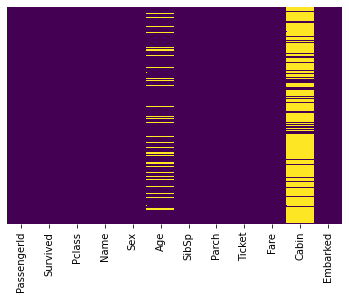

<Figure size 1440x576 with 0 Axes>

In [9]:
sns.heatmap(train.isnull(),yticklabels=False, cbar = False, cmap ='viridis')
plt.figure(figsize =(20,8))

###This example shows missing data using heat map (light color shows missing data)

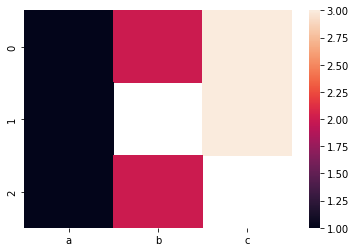

In [10]:
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.DataFrame(data = {'a': [1,1,1],
                          'b': [2, np.nan, 2],
                          'c': [3, 3, np.nan]})

mask = df.isnull()
sns.heatmap(df, mask = mask)

##EDA

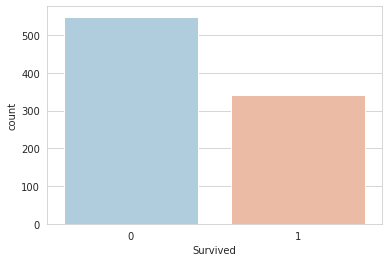

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

###How did gender play a role in survival?

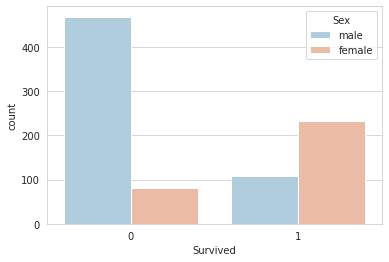

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Sex', data=train, palette='RdBu_r')

###What about Class?

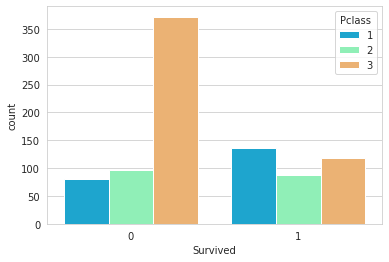

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Pclass', data=train, palette='rainbow')

###What about age?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


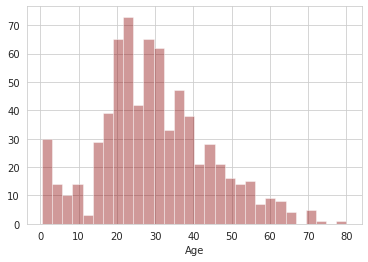

In [14]:
sns.distplot(train['Age'].dropna(), kde= False, color= 'darkred', bins=30)

###What about Siblings?

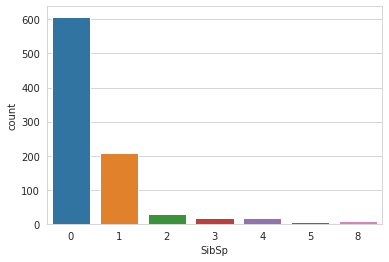

In [15]:
sns.countplot(x='SibSp', data= train)

##DATA CLEANING

###We will fill in the missing data by filling in the mean age of the passagers(imputation).

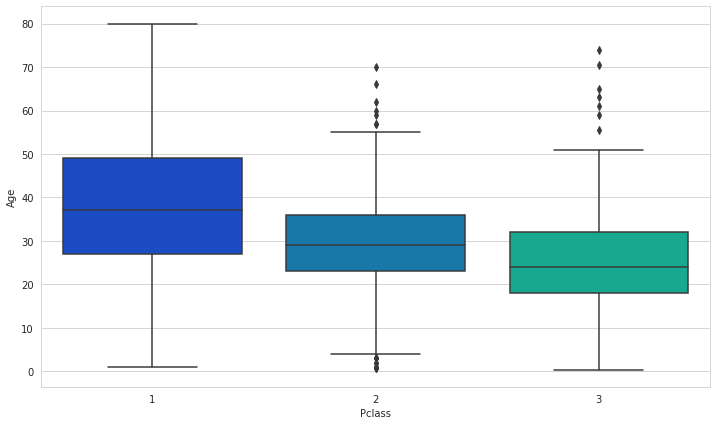

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data= train, palette='winter')

###We will create a function call impute_age using the data from the plobboxes to do the inputation.

In [17]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass ==1:
      return 37

    elif Pclass == 2:
      return 29
    
    else:
      return 24

  else:
    return Age

###We will pass the function to apply and store storing returned series in new---.apply()

In [18]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

###Let see our NA values again

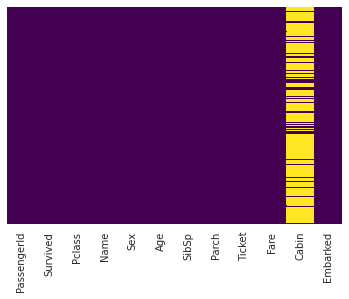

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
train.drop('Cabin',axis=1,inplace=True)

In [21]:
train.dropna(inplace=True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


###Notice via the heat map that everything is purple. This means that we no more missing values

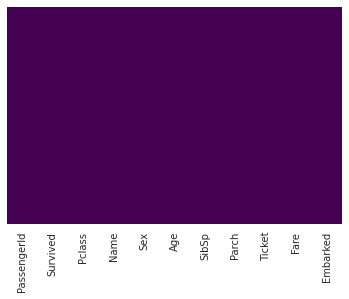

In [23]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='viridis')

##DATA WRANGLING

###To work our logistic model we will need to convert all non-numeric variables to numeric and drop not needed columns

In [24]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [25]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [26]:
train = pd.concat([train,sex,embark], axis=1)

In [27]:
train.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
5,6,0,3,24.0,0,0,8.4583,1,1,0
6,7,0,1,54.0,0,0,51.8625,1,0,1
7,8,0,3,2.0,3,1,21.0750,1,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,1
9,10,1,2,14.0,1,0,30.0708,0,0,0


##LOGISTIC MODEL

###Start by splitting our data into a training set and test set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], 
                                                    test_size =0.30, random_state =101)

###Training and Predictiong

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

predictions = logmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##EVALUATION

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267

